# ERA5 visualisation

In [2]:
import sys
sys.path.append('/Users/kenzatazi/Documents/CDT/Code/')
from load import era5

from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cf

In [3]:
data = era5.collect_ERA5('uib', '1970', '2005')

indus
/Users/kenzatazi/Documents/CDT/Code/data/ERA5/combi_data_indus_2024-01.csv


In [4]:
tp_data = data.tp

In [5]:
tp_data

<xarray.DataArray 'tp' (time: 420, lon: 39, lat: 25)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ..., 1.5922413 ,
                nan,        nan],
        ...,
        [       nan, 0.62443316, 0.4045777 , ...,        nan,
                nan,        nan],
        [0.7105619 , 0.5235709 , 0.32411516, ...,        nan,
                nan,        nan],
        [       nan, 0.4759729 , 0.28898567, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ..., 0.8771494 ,
                nan,        nan],
...
        [       nan, 0.2651848 , 0.18699095, ...,        nan,
                nan,        nan],
        [0.40231273, 0.21418929, 0.15639141, ...,        nan,
                nan,        nan],
        [       nan, 0.19832328, 0.14166161, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ..., 2.9272325 ,
                nan,        nan],
        ...,
        [       nan, 0.57343394, 0.41817874, ...,        nan,
                nan,        nan],
        [0.6402992 , 0.44764206, 0.31165034, ...,        nan,
                nan,        nan],
        [       nan, 0.39324537, 0.26178733, ...,        nan,
                nan,        nan]]])
Coordinates:
  * time     (time) object '1970-01-01' '1970-02-01' ... '2004-12-01'
  * lon      (lon) float64 72.25 72.5 72.75 73.0 73.25 ... 81.0 81.25 81.5 81.75
  * lat      (lat) float64 31.0 31.25 31.5 31.75 32.0 ... 36.25 36.5 36.75 37.0

In [6]:
locs = np.array([[73, 34.5],[75, 36], [81, 32],])

In [7]:
# select the location of the coordinates above

timeseries = []

for i in range(3):
    tp_data_interp= tp_data.sel(lon=locs[i,0], lat=locs[i,1], method='nearest')
    tp_df = tp_data_interp.to_dataframe()
    tp_df = tp_df.reset_index()
    tp_df['time'] = pd.to_datetime(tp_df['time'])
    tp_df['time'] = pd.to_numeric(tp_df['time'])
    tp_df['time'] = tp_df['time']/(1e9 * 60 * 60 * 24 * 365) + 1970
    timeseries.append(tp_df)


In [8]:
def lin_reg(timeseries):
    """
    Outputs parameter of linear model

    Inputs
        timeseries: data array

    Outputs
        lineat_model: list [slope, intercept, r_value, p_value, std_err]
    """
    linear_model = stats.linregress(
        timeseries['time'].values, timeseries['tp'].values)

    print('Linear model parameters for ' + str(timeseries.lat.values) +
          "°N, " + str(timeseries.lon.values) + "°E")
    print('Slope', linear_model[0])
    print('Intercept', linear_model[1])
    print('R value', linear_model[2])
    print('P value', linear_model[3])
    print('Standard error', linear_model[4])

    return linear_model

def linreg_plot(timeseries, linear_models):
    """
    Returns plot of linear regression on one ore more timeseries
    """

    N = len(timeseries)
    _, axs = plt.subplots(N, sharex=True, sharey=True)

    for n in range(N):

        (slope, intercept, _, p_value, std_err) = linear_models[n]

        time = timeseries[n].time.values
        axs[n].plot(timeseries[n].time.values, timeseries[n].tp.values)
        axs[n].set_title(str(timeseries[n].lat.values[0]) +
                         "°N, " + str(timeseries[n].lon.values[0]) + "°E")
        axs[n].plot(
            time,
            slope * time + intercept,
            color="green",
            linestyle="--",
            label="Slope = %.3f±%.3f mm/day/year, p-value = %.3f"% (slope, std_err, p_value),
        )
        axs[n].set_xlabel(" ")
        axs[n].set_ylabel("Total precipation [mm/day]")
        axs[n].grid(True)
        axs[n].legend()

    axs[n].set_xlabel("Year")
    plt.show()

    return axs

In [9]:
list_linear_mods = []
for data in timeseries:
    linear_model = lin_reg(data)
    # make a list of linear models
    list_linear_mods.append(linear_model)
    

Linear model parameters for [34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5
 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5
 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5
 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5
 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5
 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5
 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5
 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5
 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5
 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5
 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5
 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5
 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5
 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.5 34.

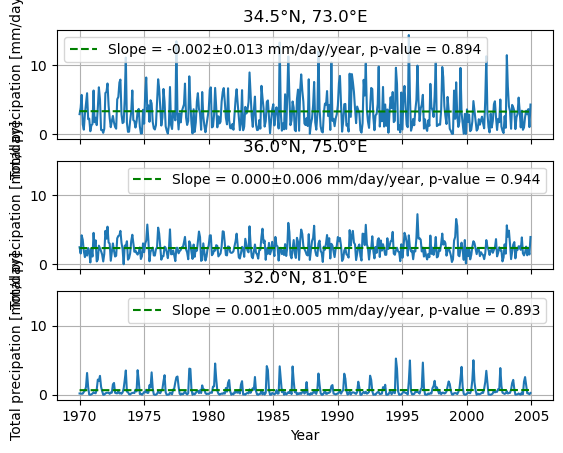

array([<AxesSubplot: title={'center': '34.5°N, 73.0°E'}, xlabel=' ', ylabel='Total precipation [mm/day]'>,
       <AxesSubplot: title={'center': '36.0°N, 75.0°E'}, xlabel=' ', ylabel='Total precipation [mm/day]'>,
       <AxesSubplot: title={'center': '32.0°N, 81.0°E'}, xlabel='Year', ylabel='Total precipation [mm/day]'>],
      dtype=object)

In [10]:
linreg_plot(timeseries, list_linear_mods)

## Maps


In [11]:
tp_data['time'] = tp_data['time'].values.astype('datetime64[M]')

/var/folders/jn/8my89c2536z23fm0t2l486340000gn/T/ipykernel_43839/1941924547.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  tp_data['time'] = tp_data['time'].values.astype('datetime64[M]')
/var/folders/jn/8my89c2536z23fm0t2l486340000gn/T/ipykernel_43839/1941924547.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timed

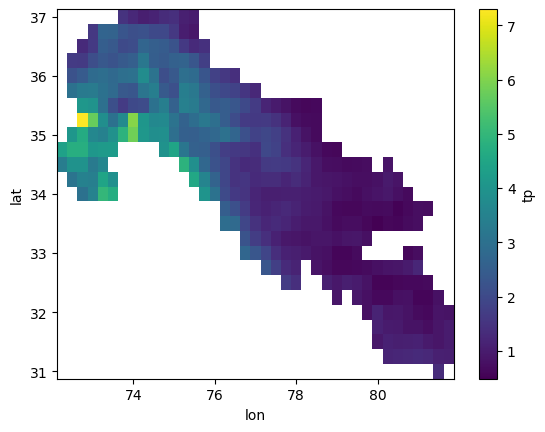

In [12]:
# mean annual precipitation
tp_data.mean(dim='time').plot(x='lon', y='lat')

In [13]:
# select for every year 4 months, JJAS
def is_jjas(month):
    """ Returns true if month is April, May or June """
    return (month == 6) | (month == 7) | (month == 8) | (month == 9)

tp_data_JJAS = tp_data.sel(time=is_jjas(tp_data['time.month']))

In [14]:
# select for every year, December to March
m = tp_data['time.month'] 
tp_data_DJFM = tp_data.sel(time=tp_data['time'][(m == 12) | (m == 1)| (m == 2) | (m == 3)])

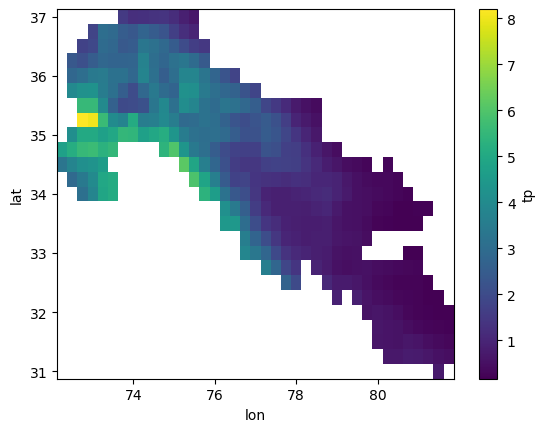

In [15]:
tp_data_DJFM.mean(dim='time').plot(x='lon', y='lat')

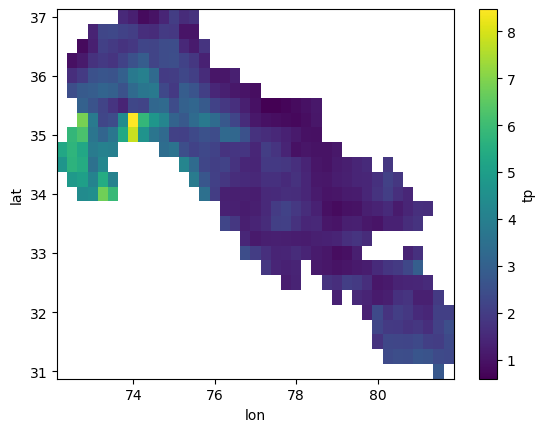

In [16]:
tp_data_JJAS.mean(dim='time').plot(x='lon', y='lat')

In [17]:
plt.rcParams.update({'font.size': 14})

/var/folders/jn/8my89c2536z23fm0t2l486340000gn/T/ipykernel_43839/2343623553.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


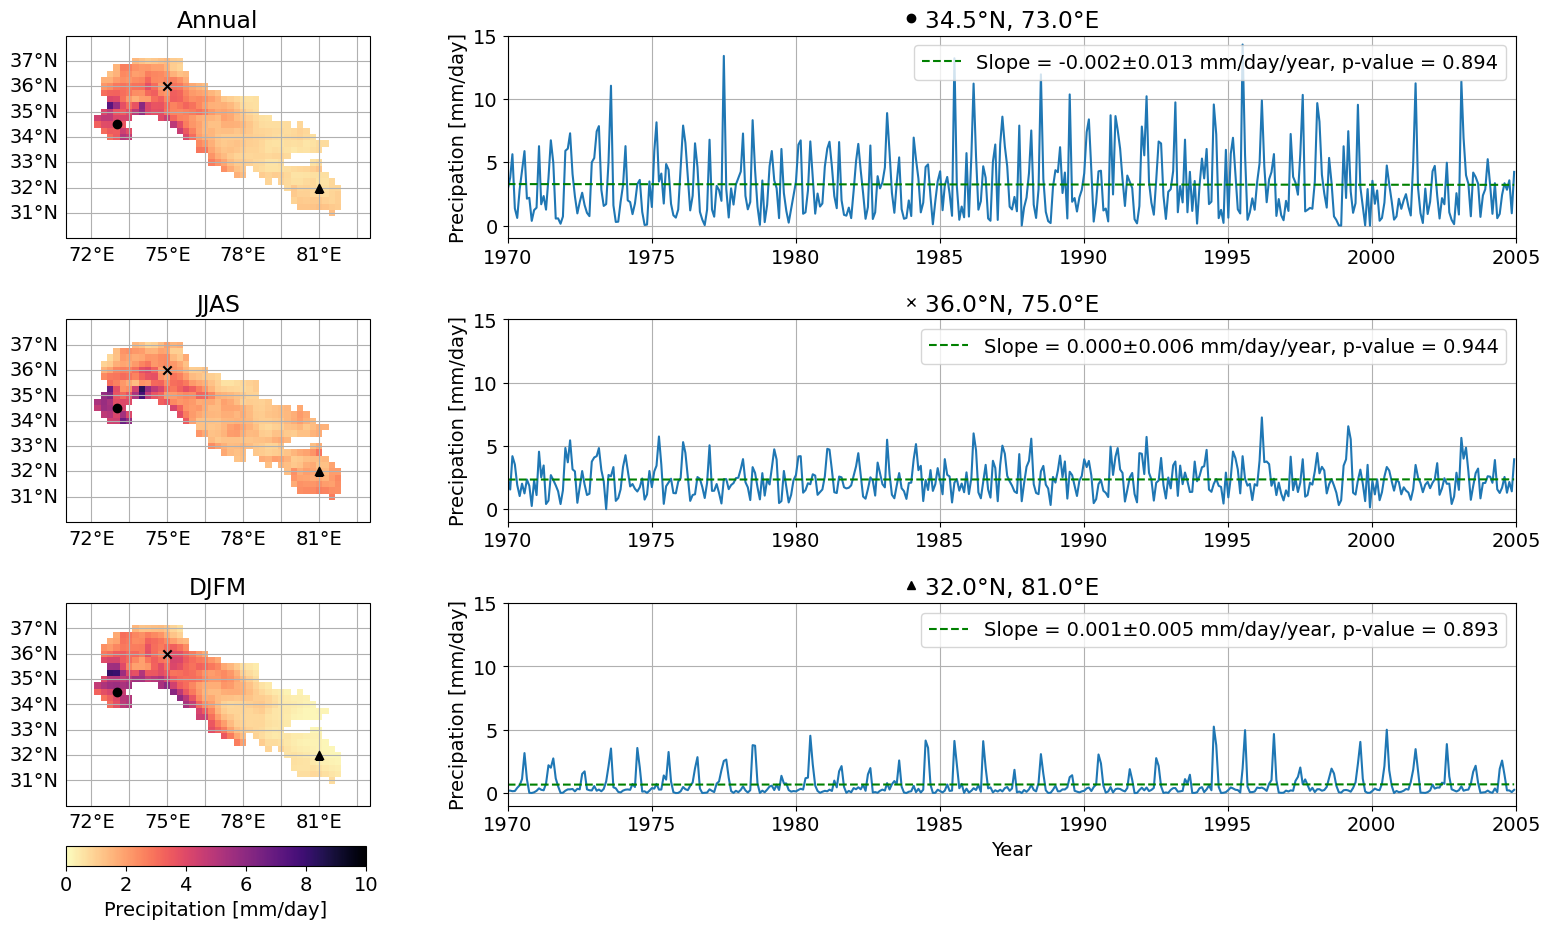

In [20]:
# make master plot!
# 6 subplots, different shapes, the left hand column plots are smaller than the right hand column plots

fig, ax = plt.subplots(3, 2, figsize=(20, 10), 
                       gridspec_kw={'width_ratios':[1, 2],'wspace':0.05, 'hspace':0.4}, 
                       subplot_kw={'projection': ccrs.PlateCarree()})

### Maps

cbar_ax = fig.add_axes([0.175, 0.05, 0.15, 0.02])

# plot 1
tp_data.mean(dim='time').plot(x='lon', y='lat', ax=ax[0, 0], cmap='magma_r', vmin=0, vmax=10, add_colorbar=False)
ax[0, 0].set_title('Annual')

# plot 2
tp_data_JJAS.mean(dim='time').plot(x='lon', y='lat', ax=ax[1, 0], cmap='magma_r',vmin=0, vmax=10, add_colorbar=False)
ax[1, 0].set_title('JJAS')   

# plot 3
tp_data_DJFM.mean(dim='time').plot(x='lon', y='lat', ax=ax[2, 0], cmap='magma_r', vmin=0, vmax=10, cbar_ax=cbar_ax,
                                   cbar_kwargs={'label': 'Precipitation [mm/day]', 'orientation': 'horizontal', })
ax[2, 0].set_title('DJFM')


for n in range(3):
    ax[n, 0].set_extent([71, 83, 30, 38])
    gl = ax[n, 0].gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    ax[n, 0].scatter(75.00, 36.00, marker='x', color='black', zorder=10)
    ax[n, 0].scatter(81.00, 32.00, marker='^', color='black', zorder=10)
    ax[n, 0].scatter(73.00, 34.50, marker='o', color='black', zorder=10)

### Timeseries

# Make new subplots with no projections
ax[0,1].remove()
ax[1,1].remove()
ax[2,1].remove()
ax[0,1] = fig.add_subplot(3, 2, 2)
ax[1,1] = fig.add_subplot(3, 2, 4)
ax[2,1] = fig.add_subplot(3, 2, 6)

# Data
linear_models =  list_linear_mods
N = len(timeseries)

markers = ['o', 'x', '^',]
for n in range(N):
    (slope, intercept, _, p_value, std_err) = linear_models[n]
    time = timeseries[n].time.values
    ax[n, 1].plot(timeseries[n].time.values, timeseries[n].tp.values)
    ax[n, 1].set_title(str(timeseries[n].lat.values[0]) +
                        "°N, " + str(timeseries[n].lon.values[0]) + "°E")
    ax[n, 1].plot(
        time,
        slope * time + intercept,
        color="green",
        linestyle="--",
        label="Slope = %.3f±%.3f mm/day/year, p-value = %.3f"% (slope, std_err, p_value),
    )
    ax[n, 1].set_xlabel(" ")
    ax[n, 1].grid(True)
    ax[n, 1].legend(loc='upper right')
    ax[n, 1].set_ylim(-1, 15)
    ax[n, 1].set_xlim(1970, 2005)
    ax[n, 1].set_ylabel("Precipation [mm/day]")
    ax[n, 1].plot(1984, 16.4, marker=markers[n], color='black', clip_on=False)


ax[2, 1].set_xlabel("Year")
plt.tight_layout()
plt.savefig('era5_vis.pdf', bbox_inches='tight', dpi=300)